In [17]:
from collections import Counter
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd

# Series.plot() DataFrame.plot()
[官网 Series.plot()](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html?highlight=plot#pandas.Series.plot)
[官网 DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

## Series 柱状图 
### LUC 占比分布

'\nCreated on Tue Sep 13 21:05:48 2022\n\n@author: MaYutong\n'

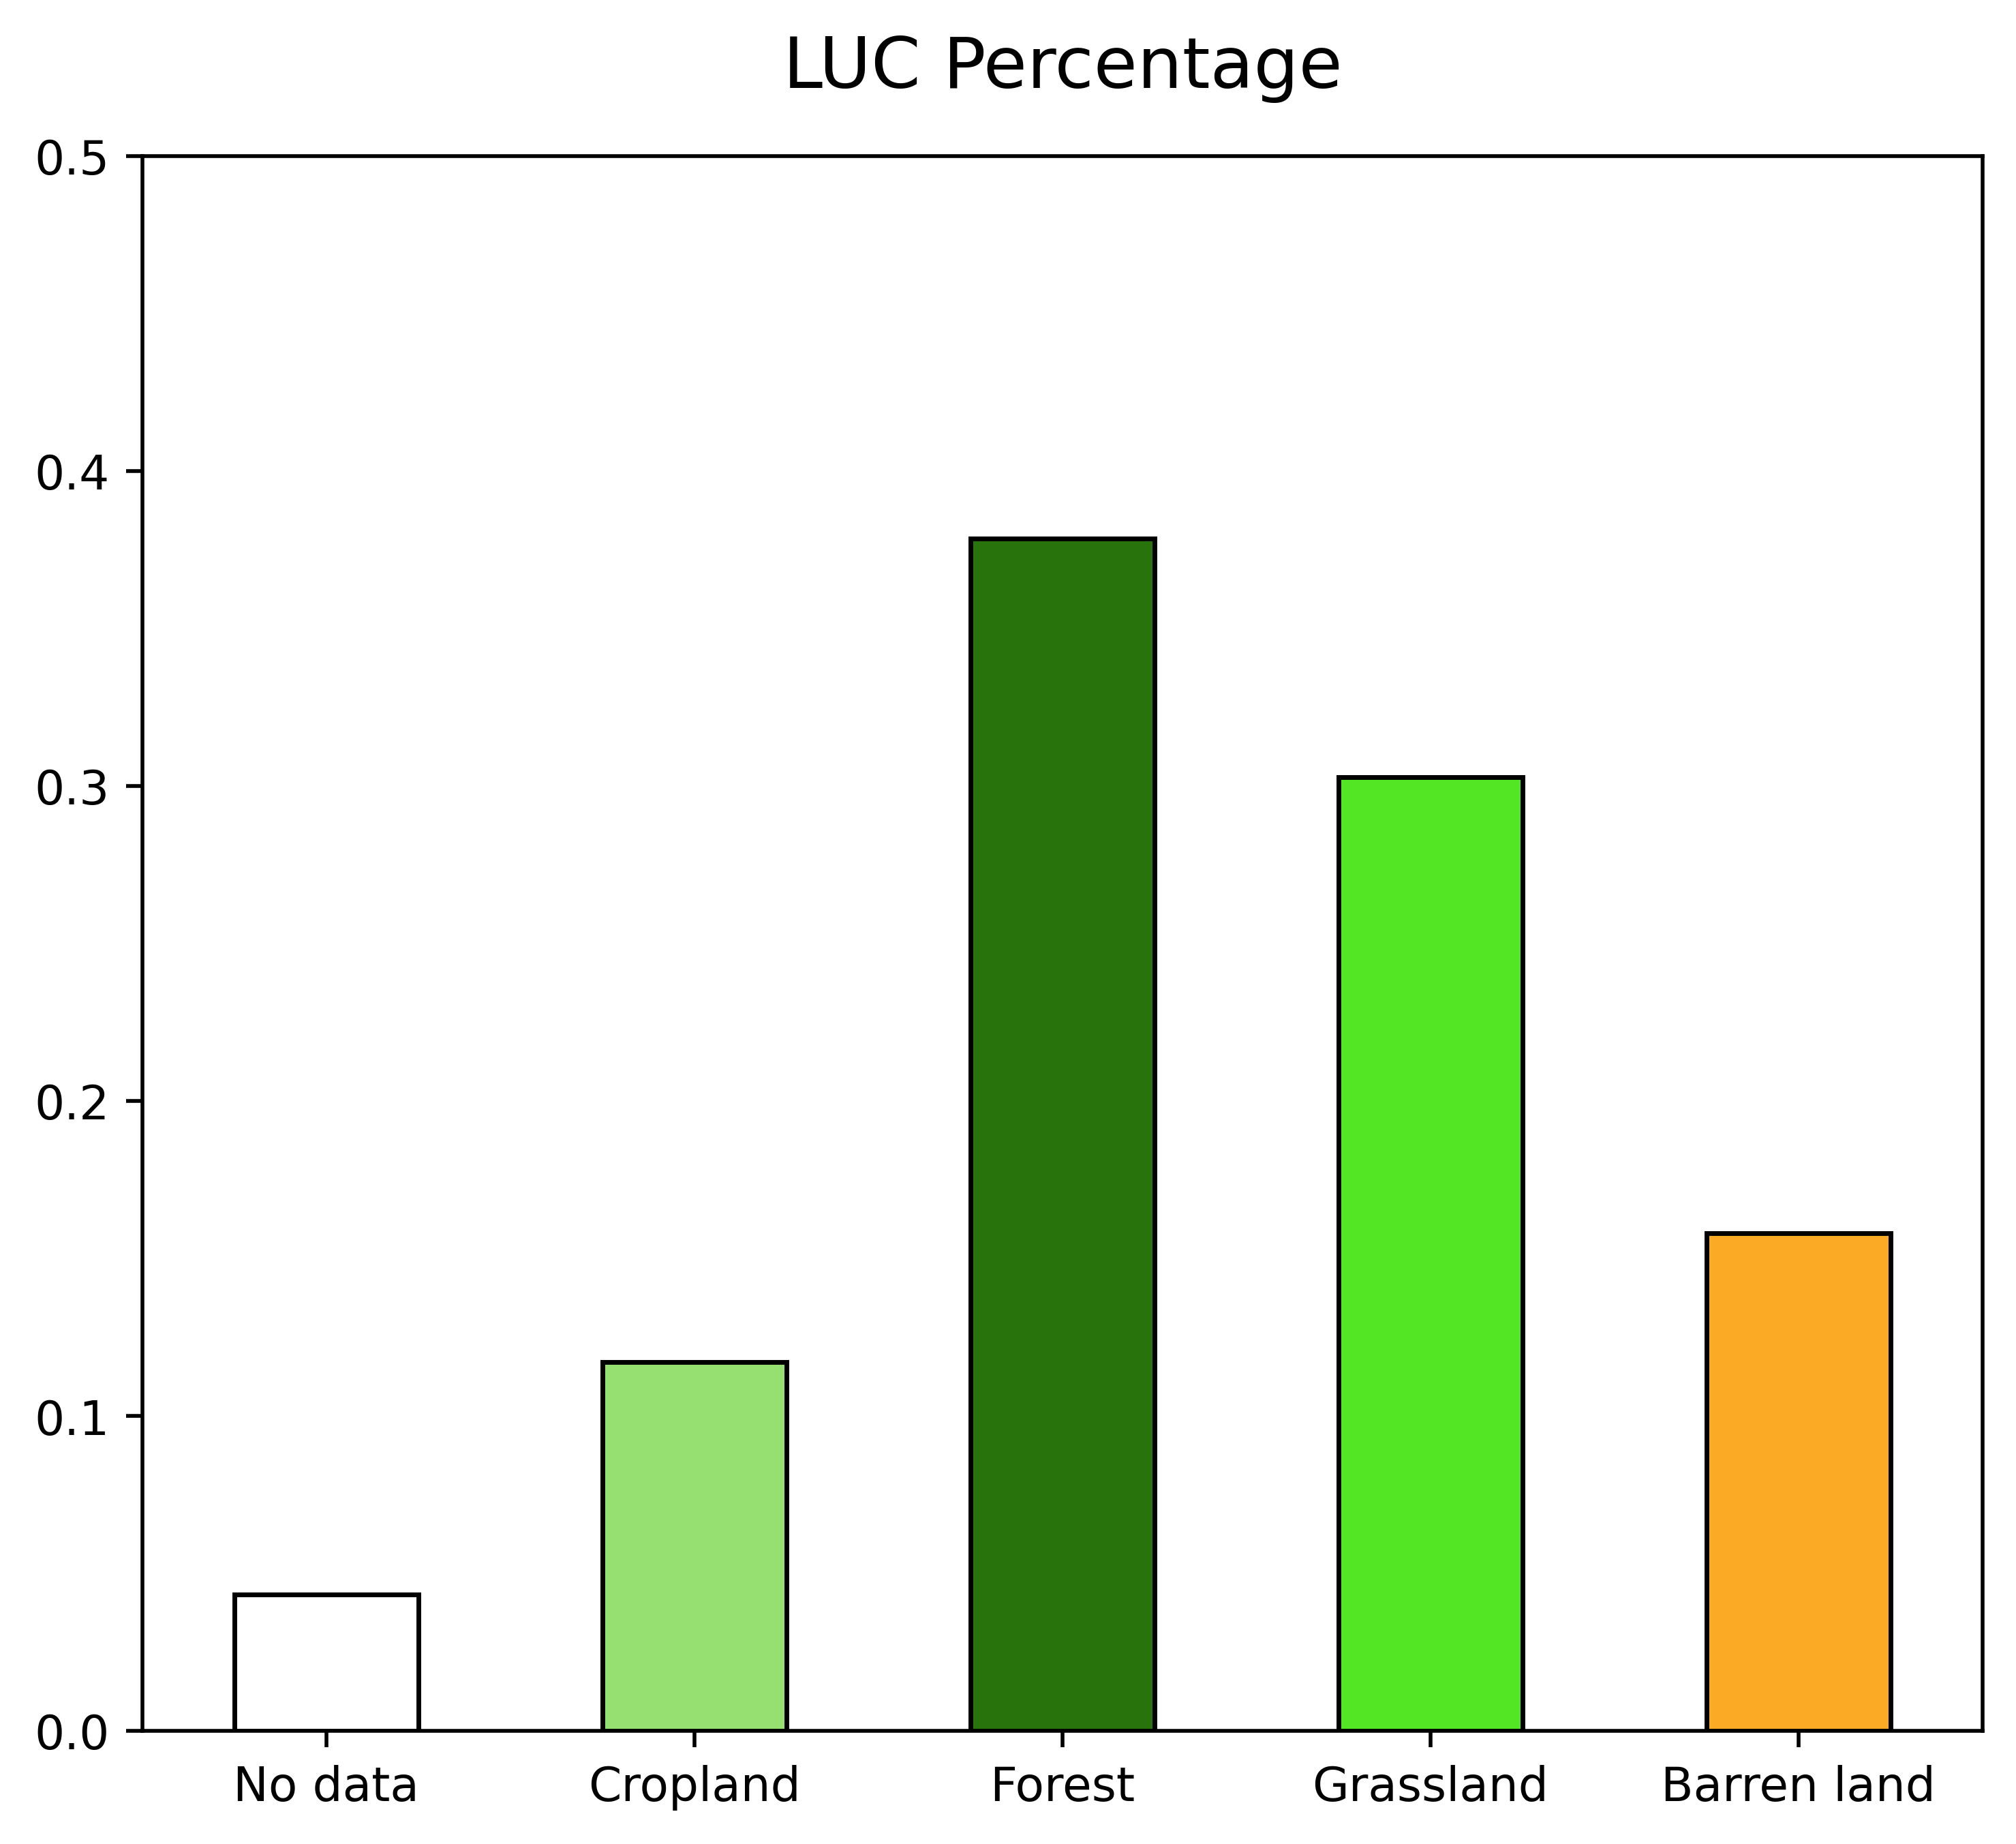

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 13 21:05:48 2022

@author: MaYutong
"""

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd


def read_nc():
    global lcc, lat, lon
    inpath = (r'E:/GLASS-GLC/GLASS-GLC_lccregion1_SPEI03_2015.nc')
    with nc.Dataset(inpath) as f:
        # print(f.variables.keys())
        lcc = (f.variables['lcc'][:])
        lat = (f.variables['lat'][:])
        lon = (f.variables['lon'][:])


def lcc_count(data):
    data = data.reshape(1, 30*70)
    data = np.squeeze(data)
    lcc_cou = pd.Series(Counter(data))

    return lcc_cou.sort_index()

# %%


def plot(data, title):
    fig = plt.figure(figsize=(6, 6), dpi=500)
    fig.subplots_adjust(left=0.05, bottom=0.15, right=0.95,
                        top=0.92, wspace=None, hspace=0.1)
    ax = fig.add_subplot(111)

    color = ["#FFFFFF", "#95E070", "#29730d", "#53E625", "#FAAA24"]

    ax1 = data.plot.bar(rot=0, ax=ax, color=color, width=0.5, edgecolor='k')

    ax.set_xticklabels(labels)

    ax.set_ylim(0, 0.5)
    ax.set_yticks(np.arange(0, 0.51, 0.1))
    #ax.set_ylabel("percent", fontsize=15)
    ax.tick_params(labelsize=10)

    plt.suptitle(f'{title}', fontsize=15)
    #plt.savefig(rf'E:/SPEI_base/JPG_NorthEast Asia region1/干旱百分比/{title}.jpg', bbox_inches='tight')
    plt.show()


# %%
read_nc()
lcc_cou = lcc_count(lcc)

labels = ["No data", "Cropland", "Forest", "Grassland", "Barren land"]
df = lcc_cou/2100

plot(df, "LUC Percentage")